In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pylab as plt

# camera dataset


In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/Gopikrishnan96/master/main/camera_dataset.csv')

In [3]:
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [4]:
df.size

13494

In [5]:
df.sample(5)

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
991,Sony DSC-V3,2004,3072.0,2592.0,7.0,34.0,136.0,40.0,10.0,0.0,390.0,120.0,429.0
435,Kodak V550,2005,2569.0,2576.0,5.0,36.0,108.0,60.0,7.0,32.0,160.0,94.0,126.0
152,Casio Exilim EX-Z700,2006,3072.0,2560.0,7.0,38.0,114.0,40.0,15.0,8.0,154.0,89.0,329.0
820,Ricoh Caplio R6,2007,3072.0,2592.0,7.0,28.0,200.0,30.0,1.0,54.0,165.0,100.0,99.0
112,Canon PowerShot SD630,2006,2816.0,2272.0,6.0,35.0,105.0,30.0,3.0,16.0,175.0,90.0,199.0


In [6]:
type(df.Price.values)

numpy.ndarray

In [7]:
type(df.Dimensions.values)

numpy.ndarray

In [8]:
df = df.rename(columns={"Weight (inc. batteries)": "Weight"})
df.head(5)

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight,Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [9]:
df.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight,Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1037.000000,1036.000000,1036.000000,1036.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.100081,27.440655,260.410137,24.262761,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


In [10]:
df.Price.isnull().sum()

0

In [11]:
print('Mean : ', df.Price.mean())
print('Std. dev : ', df.Price.std())
print('Min : ', df.Price.min())
print('Max : ', df.Price.max())
print('Median : ', df.Price.median())
print('Length : ', len(df.Price))

Mean :  457.38439306358384
Std. dev :  760.4529176412254
Min :  14.0
Max :  7999.0
Median :  199.0
Length :  1038


In [12]:
#the following data is right skewed since mean is more compared to median

In [13]:
 co=df.corr().round(2)

In [14]:
import seaborn as sns


<AxesSubplot:>

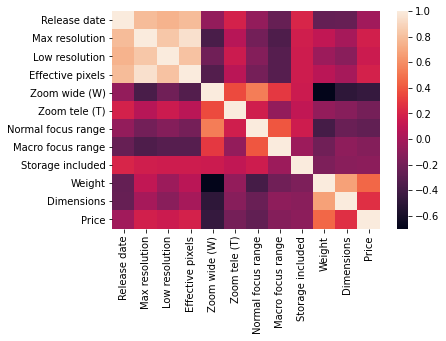

In [15]:
sns.heatmap(co, xticklabels=co.columns, yticklabels=co.columns)

<AxesSubplot:>

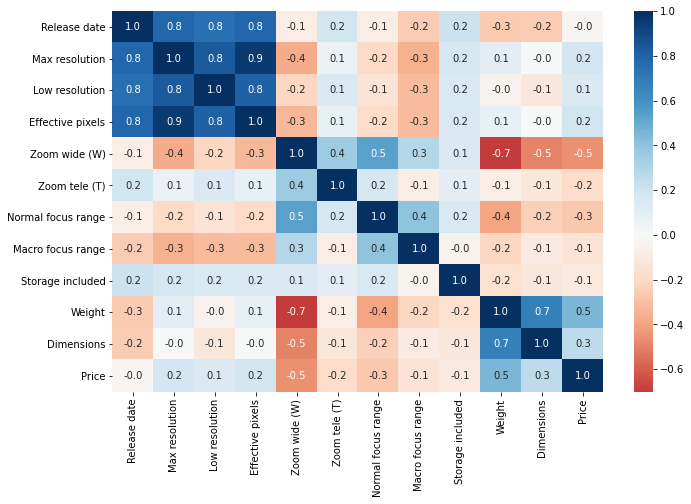

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(co, annot=True, fmt='.1f', cmap='RdBu', center=0, ax=ax)

In [17]:
df.columns

Index(['Model', 'Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included', 'Weight',
       'Dimensions', 'Price'],
      dtype='object')

In [18]:
missingRows = df.sample(10).index
missingRows

Int64Index([412, 175, 658, 743, 966, 449, 26, 869, 421, 262], dtype='int64')

In [19]:
df.loc[missingRows, "Effective pixels"] = np.nan

In [20]:
df.loc[missingRows]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight,Dimensions,Price
412,Kodak DX6340,2003,2032.0,0.0,NaN,36.0,144.0,50.0,10.0,16.0,280.0,109.0,126.0
175,Casio QV-7000SX,1998,1280.0,640.0,NaN,32.0,64.0,23.0,10.0,8.0,320.0,141.0,249.0
658,Olympus Stylus 300,2003,2048.0,1600.0,NaN,35.0,105.0,50.0,20.0,16.0,220.0,99.0,229.0
743,Panasonic Lumix DMC-TZ3,2007,3072.0,2560.0,NaN,28.0,280.0,50.0,5.0,13.0,280.0,105.0,299.0
966,Sony DSC-S700,2007,3072.0,2592.0,NaN,35.0,105.0,35.0,5.0,24.0,178.0,91.0,149.0
449,Kodak Z760,2005,2872.0,2856.0,NaN,39.0,117.0,60.0,7.0,32.0,259.0,100.0,126.0
26,Canon PowerShot A520,2005,2272.0,1600.0,NaN,35.0,140.0,0.0,5.0,16.0,230.0,91.0,149.0
869,Samsung NV11,2007,3648.0,3136.0,NaN,35.0,190.0,80.0,1.0,0.0,240.0,107.0,229.0
421,Kodak LS633,2003,2041.0,0.0,NaN,37.0,111.0,60.0,13.0,16.0,260.0,114.0,126.0
262,Fujifilm FinePix F700,2003,2832.0,2048.0,NaN,35.0,105.0,60.0,9.0,16.0,205.0,108.0,169.0


In [21]:
print("Number of rows with valid efffective pixels values after setting to NAN: ",df["Effective pixels"].count())

Number of rows with valid efffective pixels values after setting to NAN:  1028


In [22]:

red_df = df.dropna()

In [23]:
print("Number of rows after removing rows with missing values: ",len(red_df))

Number of rows after removing rows with missing values:  1026


In [24]:
medianpixels = df["Effective pixels"].median()

In [25]:
medianpixels

4.0

In [26]:
df.columns = [s.strip().replace(" " , "_") for s in df.columns]

In [27]:
df.Effective_pixels = df.Effective_pixels.fillna(value=medianpixels)

In [28]:
print("Number of rows with valid effective pixels values after filling NA values: ",df["Effective_pixels"].count())

Number of rows with valid effective pixels values after filling NA values:  1038


In [29]:
#normalising and rescaling

In [30]:
import pandas as pd

In [31]:
df1=df.copy()

In [32]:
df1.columns

Index(['Model', 'Release_date', 'Max_resolution', 'Low_resolution',
       'Effective_pixels', 'Zoom_wide_(W)', 'Zoom_tele_(T)',
       'Normal_focus_range', 'Macro_focus_range', 'Storage_included', 'Weight',
       'Dimensions', 'Price'],
      dtype='object')

In [33]:
df.mean()

Release_date          2003.590559
Max_resolution        2474.672447
Low_resolution        1773.936416
Effective_pixels         4.590559
Zoom_wide_(W)           32.963391
Zoom_tele_(T)          121.525048
Normal_focus_range      44.145472
Macro_focus_range        7.787850
Storage_included        17.447876
Weight                 319.265444
Dimensions             105.363417
Price                  457.384393
dtype: float64

In [34]:
df.std()

Release_date            2.724755
Max_resolution        759.513608
Low_resolution        830.897955
Effective_pixels        2.833024
Zoom_wide_(W)          10.333149
Zoom_tele_(T)          93.455422
Normal_focus_range     24.141959
Macro_focus_range       8.100081
Storage_included       27.440655
Weight                260.410137
Dimensions             24.262761
Price                 760.452918
dtype: float64

In [35]:
pp=df.iloc[:,0:13]

In [36]:
pp.head(2)


,Model,Release_date,Max_resolution,Low_resolution,Effective_pixels,Zoom_wide_(W),Zoom_tele_(T),Normal_focus_range,Macro_focus_range,Storage_included,Weight,Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0


In [37]:
camera = (pp - pp.mean())/ pp.std()

In [38]:
camera.head(2)

,Dimensions,Effective_pixels,Low_resolution,Macro_focus_range,Max_resolution,Model,Normal_focus_range,Price,Release_date,Storage_included,Weight,Zoom_tele_(T),Zoom_wide_(W)
0,-0.427133,-1.620374,-1.364712,3.976769,-1.910002,NaN,1.070937,-0.366077,-2.418771,-0.490071,0.38683,-0.08052,0.487422
1,2.169439,-1.267394,-1.364712,-0.961453,-1.572944,NaN,0.242504,-0.366077,-2.051766,-0.490071,0.38683,-0.08052,0.487422


In [39]:
df.drop(["Model"], axis = 1, inplace = True)

In [40]:
df

,Release_date,Max_resolution,Low_resolution,Effective_pixels,Zoom_wide_(W),Zoom_tele_(T),Normal_focus_range,Macro_focus_range,Storage_included,Weight,Dimensions,Price
0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df1 = df.copy()
# Normalizing a data frame
# pandas:
norm_df = (df - df.mean()) / df.std()
# scikit-learn:
scaler = StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df),
index=df.index, columns=df.columns)

norm_df = (df - df.min()) / (df.max() -
df.min())
# scikit-learn:
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df),
index=df.index, columns=df.columns)

In [42]:
norm_df.head(2)

,Release_date,Max_resolution,Low_resolution,Effective_pixels,Zoom_wide_(W),Zoom_tele_(T),Normal_focus_range,Macro_focus_range,Storage_included,Weight,Dimensions,Price
0,0.230769,0.182336,0.128205,0.000000,0.730769,0.220077,0.583333,0.470588,0.008889,0.225806,0.395833,0.020664
1,0.307692,0.227920,0.128205,0.047619,0.730769,0.220077,0.416667,0.000000,0.008889,0.225806,0.658333,0.020664


In [43]:
#group by in preprocessing with respect to price range.
df.groupby('Price').count()

,Release_date,Max_resolution,Low_resolution,Effective_pixels,Zoom_wide_(W),Zoom_tele_(T),Normal_focus_range,Macro_focus_range,Storage_included,Weight,Dimensions
Price,,,,,,,,,,,
14.0,2,2,2,2,2,2,2,2,2,2,2
19.0,2,2,2,2,2,2,2,2,2,2,2
62.0,10,10,10,10,10,10,10,10,10,10,10
99.0,32,32,32,32,32,32,32,32,32,32,32
119.0,4,4,4,4,4,4,4,4,4,4,4
126.0,41,41,41,41,41,41,41,41,41,41,41
129.0,92,92,92,92,92,92,92,92,92,92,92
139.0,34,34,34,34,34,34,34,34,34,34,34
146.0,8,8,8,8,8,8,8,8,8,8,8


In [44]:
 #skewness transformation of the price tag.
 %matplotlib inline
import matplotlib.pyplot as plt

In [45]:

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

<Figure size 720x540 with 0 Axes>

Text(0.5, 0, 'Square Root Units')

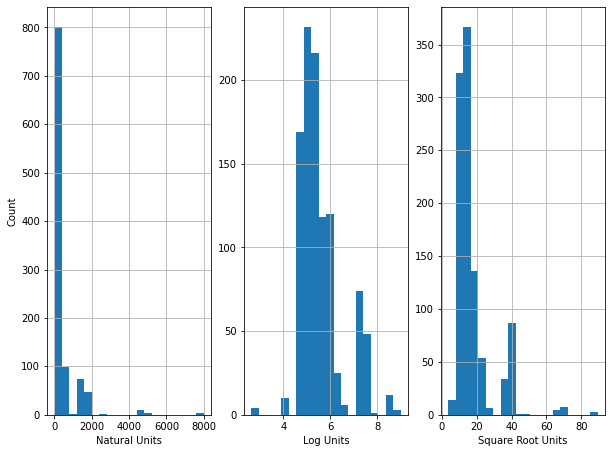

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.hist(df['Price'].values, bins=20)
ax1.set_xlabel('Natural Units')
ax1.set_ylabel('Count')

ax2.hist(np.log(df['Price'].values), bins=20)
ax2.set_xlabel('Log Units')

ax3.hist(np.sqrt(df['Price'].values), bins=20)
ax3.set_xlabel('Square Root Units')

In [47]:
from scipy.stats import skew
r = np.max(df['Price'].values)/np.min(df['Price'].values)
skewness = skew(df['Price'].values)
skewness

5.17945844837875

In [48]:
from scipy.stats import boxcox
boxcox(df['Price'].values)[1]

-0.36444783091384036

-0.36444783091384036

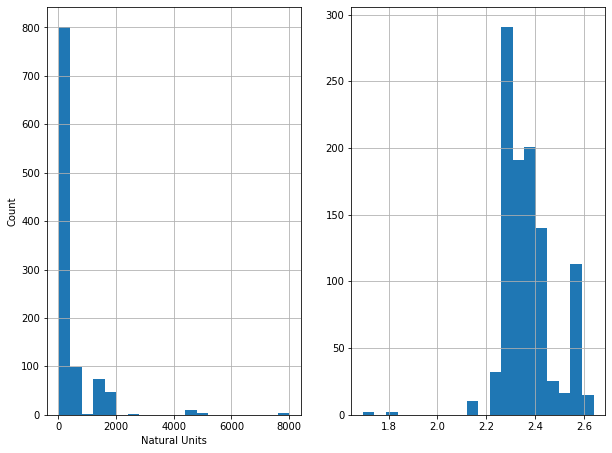

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist(df['Price'].values, bins=20)
ax1.set_xlabel('Natural Units')
ax1.set_ylabel('Count')

ax2.hist(boxcox(df['Price'].values)[0], bins=20)
boxcox(df['Price'].values)[1]

In [50]:
#train test split using cross validation.
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [51]:
df.head(2)

,Release_date,Max_resolution,Low_resolution,Effective_pixels,Zoom_wide_(W),Zoom_tele_(T),Normal_focus_range,Macro_focus_range,Storage_included,Weight,Dimensions,Price
0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0


In [52]:
import sklearn.model_selection as model_selection

In [53]:
import sklearn.model_selection as model_selection
trainData, validData = model_selection.train_test_split(df, test_size=0.40,random_state=1)

In [54]:
print("Training : ", trainData.shape)
print("Validation : ", validData.shape)
print()

Training :  (622, 12)
Validation :  (416, 12)



In [55]:
trainData, temp = model_selection.train_test_split(df, test_size=0.5, random_state=1)

In [56]:
validData, testData = model_selection.train_test_split(temp, test_size=0.4, random_state=1)

In [57]:
print("Training : ", trainData.shape)
print("Test : ", testData.shape)

Training :  (519, 12)
Test :  (208, 12)


In [58]:
#outlier 


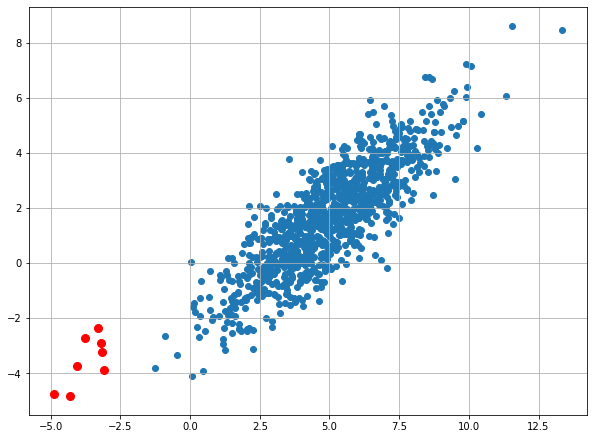

In [59]:
beta0 = -2.3 # intercept
beta1 = 0.8 # slope
n = 1000
x1_true = np.random.normal(5, 2, n)
x2_true = np.zeros(n)

# generate a random sample
for i in range(n):
    x2_true[i] = beta0 + beta1*x1_true[i] + np.random.normal(size = 1)
    
# generate outliers
x1_outliers = np.random.uniform(-5, -3, 8)
x2_outliers = np.zeros(8)
for i in range(8):
    x2_outliers[i] = x1_outliers[i] + np.random.normal(size = 1)

plt.scatter(x1_true, x2_true)
plt.plot(x1_outliers, x2_outliers, 'ro', markersize=8)

[[ 0.3836278   0.33670151]
 [-0.38558788 -0.76310622]
 [-0.31453969 -0.45331165]
 ...
 [-4.56300135 -3.24435248]
 [-4.30243021 -3.29236316]
 [-3.72400021 -2.81373826]]


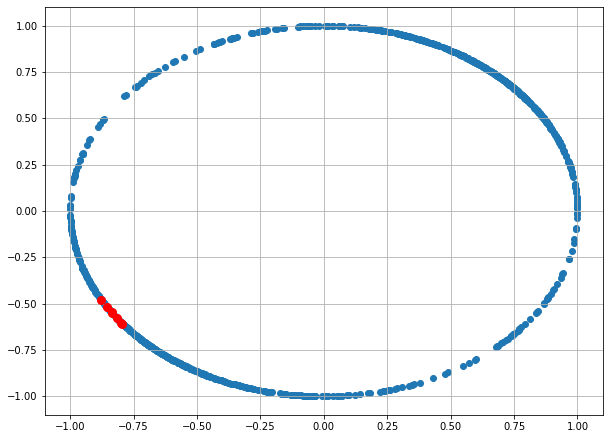

In [60]:
from sklearn.preprocessing import scale
x1 = scale(np.concatenate([x1_true, x1_outliers]))
x2 = scale(np.concatenate([x2_true, x2_outliers]))
x = zip(x1, x2)
mylist=list(x)
X11=np.array(mylist)
print(X11)
#spatial sign
dist = X11[:, 0]**2 + X11[:, 1]**2
x1 = X11[:, 0]/np.sqrt(dist)
x2 = X11[:, 1]/np.sqrt(dist)

plt.scatter(x1[:-8], x2[:-8])
plt.plot(x1[-7:], x2[-7:], 'ro', markersize=8)